<a href="https://colab.research.google.com/github/KristinaKryazheva/PDA-SOL/blob/main/%D1%81%D0%BC_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv')

In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/subscribers.csv')

In [4]:
df3 = pd.read_csv('/content/drive/MyDrive/users.csv')

In [5]:
df1

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True
...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True
10033,a11033,1/17/18,Email,control,German,True
10034,a11034,1/5/18,Instagram,control,German,False
10035,a11035,1/17/18,Email,control,German,True


In [6]:
df2

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True
...,...,...,...,...,...
10032,a11032,Email,1/17/18,1/24/18,False
10033,a11033,Email,1/17/18,NaN,True
10034,a11034,Email,1/17/18,NaN,True
10035,a11035,Email,1/17/18,NaN,True


In [7]:
df3

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English
...,...,...,...
10032,a11032,45-55 years,German
10033,a11033,55+ years,German
10034,a11034,55+ years,German
10035,a11035,0-18 years,German


In [8]:
# Объединение датасетов
merged_df = pd.merge(df1, df2, on='user_id')
df = pd.merge(merged_df, df3, on='user_id')

In [9]:
df

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a11032,1/17/18,Email,control,German,True,Email,1/17/18,1/24/18,False,45-55 years,German
10033,a11033,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,55+ years,German
10034,a11034,1/5/18,Instagram,control,German,False,Email,1/17/18,NaN,True,55+ years,German
10035,a11035,1/17/18,Email,control,German,True,Email,1/17/18,NaN,True,0-18 years,German


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   language_displayed   10037 non-null  object
 5   converted            10022 non-null  object
 6   subscribing_channel  1856 non-null   object
 7   date_subscribed      1856 non-null   object
 8   date_canceled        577 non-null    object
 9   is_retained          1856 non-null   object
 10  age_group            10037 non-null  object
 11  language_preferred   10037 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [11]:
df['date_served'] = pd.to_datetime(df['date_served'])
df['converted'] = df['converted'].astype(bool)
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_canceled'] = pd.to_datetime(df['date_canceled'])
df['is_retained'] = df['is_retained'].astype(bool)

In [12]:
df.describe().T

<ipython-input-12-ab545e235235>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe().T
<ipython-input-12-ab545e235235>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe().T
<ipython-input-12-ab545e235235>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe().T


,count,unique,top,freq,first,last
user_id,10037,10037,a1000,1,NaT,NaT
date_served,10021,31,2018-01-15 00:00:00,789,2018-01-01,2018-01-31
marketing_channel,10022,5,House Ads,4733,NaT,NaT
variant,10037,2,control,5091,NaT,NaT
language_displayed,10037,4,English,9793,NaT,NaT
converted,10037,2,False,8946,NaT,NaT
subscribing_channel,1856,5,Instagram,600,NaT,NaT
date_subscribed,1856,31,2018-01-16 00:00:00,163,2018-01-01,2018-01-31
date_canceled,577,115,2018-04-02 00:00:00,15,2018-01-05,2018-05-09
is_retained,10037,2,True,9460,NaT,NaT


In [13]:
df.isnull().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
language_displayed        0
converted                 0
subscribing_channel    8181
date_subscribed        8181
date_canceled          9460
is_retained               0
age_group                 0
language_preferred        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   language_displayed   10037 non-null  object        
 5   converted            10037 non-null  bool          
 6   subscribing_channel  1856 non-null   object        
 7   date_subscribed      1856 non-null   datetime64[ns]
 8   date_canceled        577 non-null    datetime64[ns]
 9   is_retained          10037 non-null  bool          
 10  age_group            10037 non-null  object        
 11  language_preferred   10037 non-null  object        
dtypes: bool(2), datetime64[ns](3), object(7)
memory usage: 882.2+ KB


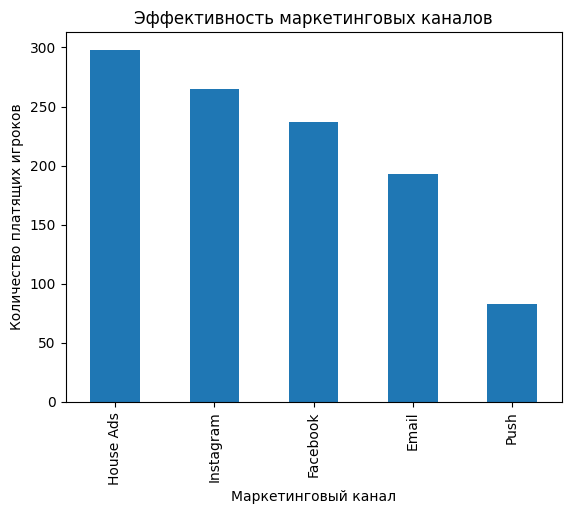

In [15]:
df_paying = df[df['converted']==True]
channel_counts = df_paying['marketing_channel'].value_counts()
channel_counts.plot(kind='bar')
plt.xlabel('Маркетинговый канал')
plt.ylabel('Количество платящих игроков')
plt.title('Эффективность маркетинговых каналов')
plt.show()

На основе гистограммы можно сделать вывод, что наиболее эффективным маркетинговым каналом стал "House Ads", а наименее эффективным- "Push"

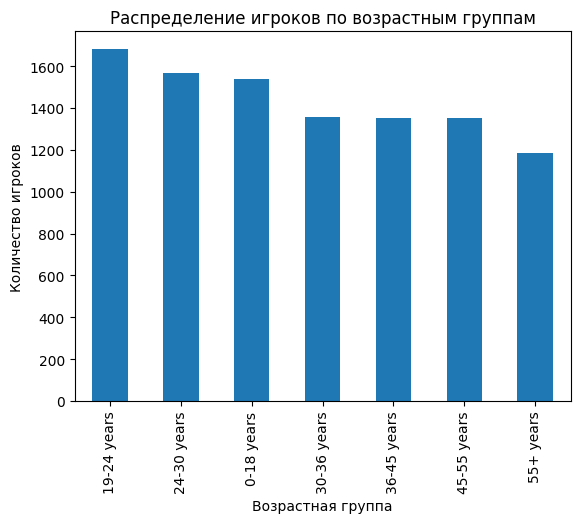

In [16]:
age_counts = df['age_group'].value_counts()
age_counts.plot(kind='bar')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество игроков')
plt.title('Распределение игроков по возрастным группам')
plt.show()

Наиболее часто встреяающийся возраст- 19-24 года, наименее- 55+ лет.

In [17]:
#самая ранняя дата подписки
df['date_subscribed'].min()

Timestamp('2018-01-01 00:00:00')

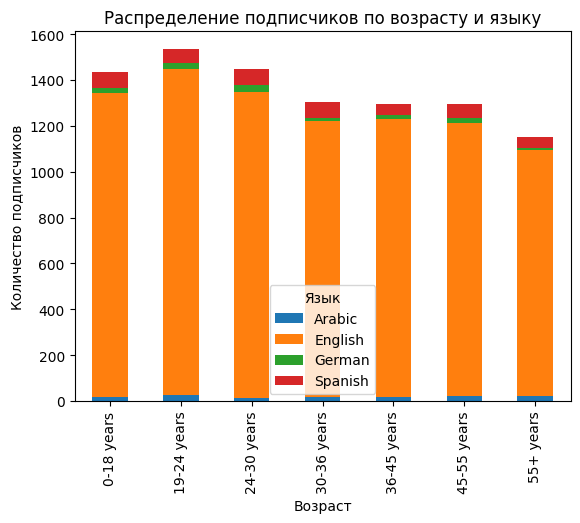

In [18]:
df_retained = df[df['is_retained']==True]
pivot_table = df_retained.groupby(['age_group','language_preferred']).size().unstack()
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Возраст')
plt.ylabel('Количество подписчиков')
plt.title('Распределение подписчиков по возрасту и языку')
plt.legend(title='Язык')
plt.show()

По графику видно, что большинство удержанных подписчиков выбирают английский язык, на втором месте испанский.

Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [37]:
data = {
    'variant': ['personalization', 'control'],
    'Converted=True': [df[(df['variant'] == 'personalization') & (df['converted'] == True)].shape[0],
                       df[(df['variant'] == 'control') & (df['converted'] == True)].shape[0]],
    'Converted=False': [df[(df['variant'] == 'personalization') & (df['converted'] == False)].shape[0],
                        df[(df['variant'] == 'control') & (df['converted'] == False)].shape[0]]
}

table = pd.DataFrame(data)
print(table)

           variant  Converted=True  Converted=False
0  personalization             705             4241
1          control             386             4705


In [30]:
from scipy import stats
controlconversion = df[df['variant'] == 'control']['converted']
personalizationconversion = df[df['variant'] == 'personalization']['converted']
# Проведение независимого двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(controlconversion, personalizationconversion, equal_var=True)
print('T-статистика:', t_statistic)
print('P-значение:', p_value)


T-статистика: -10.797432921338595
P-значение: 4.981763610608635e-27


В данном случае P-значение очень маленькое, что говорит о том, что нулевая гипотеза может быть с уверенностью отклонена в любом случае. Это указывает на то, что между двумя группами данных существует статистически значимая разница. В группе personalization конверсия больше.

Задание 2

Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

x - количество стульев, которое нужно произвести,
y - количество столов, которое нужно произвести.

5x + 20y <= 400, (уравнение, ограничивающее количество материала)
10x + 15y <= 450, (уравнение, ограничивающее количество человеко-часов)
x, y >= 0. (неотрицательное количество мебели)
Целевая функция - прибыль, которую нужно максимизировать:

Прибыль = 45x + 80y

In [ ]:
from scipy.optimize import minimize

# Определяем функцию прибыли
def profit(x):
    num_chairs = x[0]
    num_tables = x[1]
    return -45 * num_chairs - 80 * num_tables

# Определяем ограничения
def constraint_material(x):
    num_chairs = x[0]
    num_tables = x[1]
    return 5 * num_chairs + 20 * num_tables - 400

def constraint_hours(x):
    num_chairs = x[0]
    num_tables = x[1]
    return 10 * num_chairs + 15 * num_tables - 450

# Определяем начальное приближение
x0 = [0, 0]

# Определяем границы переменных
bounds = ((0, None), (0, None))

# Определяем ограничения
constraints = [{'type': 'ineq', 'fun': constraint_material}, {'type': 'ineq', 'fun': constraint_hours}]

# Максимизируем функцию прибыли
res = minimize(profit, x0, method='SLSQP', bounds=bounds, constraints=constraints)

# Выводим результаты
print("Максимальная прибыль: $" + str(-res.fun))
print("Количество стульев: " + str(res.x[0]))
print("Количество столов: " + str(res.x[1]))

Максимальная прибыль: $6.03772443502692e+34
Количество стульев: 3.2249013114291046e+32
Количество столов: 5.733148556104778e+32


Задание 3

Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3 0.6$, day7 0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [ ]:
df1 = pd.DataFrame({'day': [1,3,7,14, 21, 30],
                   'revenue': [0.4, 0.6, 0.8, 1.10, 1.30, 1.40]})


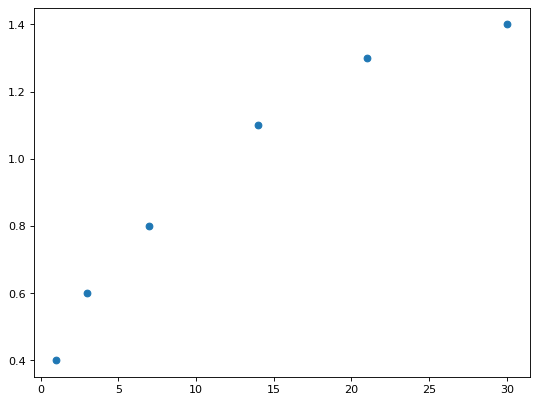

In [ ]:
# определяем тип возможной кривой по диаграмме рассеяния
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df1['day'], df1['revenue'], label="Original Data" )

In [ ]:
# задаем аппроксимирующую логарифмияескую функцию
def log_func( x, a, b, c ):
    return -a * np.log2( b + x ) + c

In [ ]:
# задаем аппроксимирующую экспоненциальную функцию
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [ ]:
# подбираем оптимальные параметры функции
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(log_func, df1['day'], df1['revenue'])
exp_popt, exp_pcov = curve_fit(exp_func, df1['day'], df1['revenue'])

In [ ]:
projection_endpoint = 90

In [ ]:
# задаем значения функции x с помощью метода np.arange и параметры подобранной кривой
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

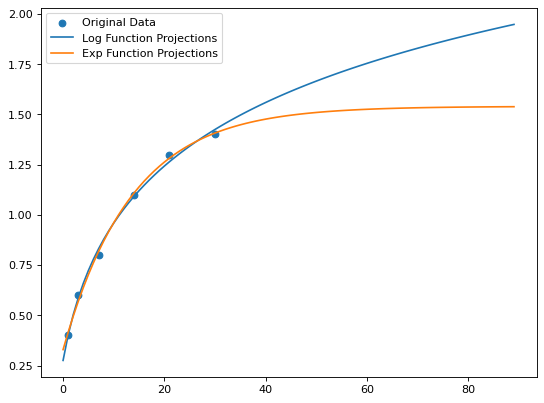

In [ ]:
# смотрим график исходных данных и полученных кривых
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df1['day'], df1['revenue'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [ ]:
print('Прогноз среднего накопленного дохода через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз среднего накопленного дохода  через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз среднего накопленного дохода через 90 дней по log модели 2.0
Прогноз среднего накопленного дохода  через 90 дней по exp модели 2.0


In [ ]:
y_log_pred = [log_y_projected[ i ] for i in list(df1['day'])]
y_log_pred

[0.40124030788520265,
 0.5868265922309144,
 0.8306563452037643,
 1.0918230784760043,
 1.2643750867065862,
 1.4250785895188456]

In [ ]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df1['day'])]
y_exp_pred

[0.4152644555519349,
 0.5694065241828665,
 0.81720684756981,
 1.108495305483976,
 1.2823787722727733,
 1.4072480949334225]

Логарифмическая функция аппроксимирует исследуемую зависимость с меньшей среднеквадратической ошибкой, поэтому целесообразнее использовать для прогноза только данную функцию.